In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model, model_selection, metrics, pipeline, tree, ensemble, neighbors, svm
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [3]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [4]:
np.min(df_train.values), np.max(df_train.values)

(0, 255)

In [5]:
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255

y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

In [6]:
28 * 28

784

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_train[0].reshape((28, 28)).shape

(28, 28)

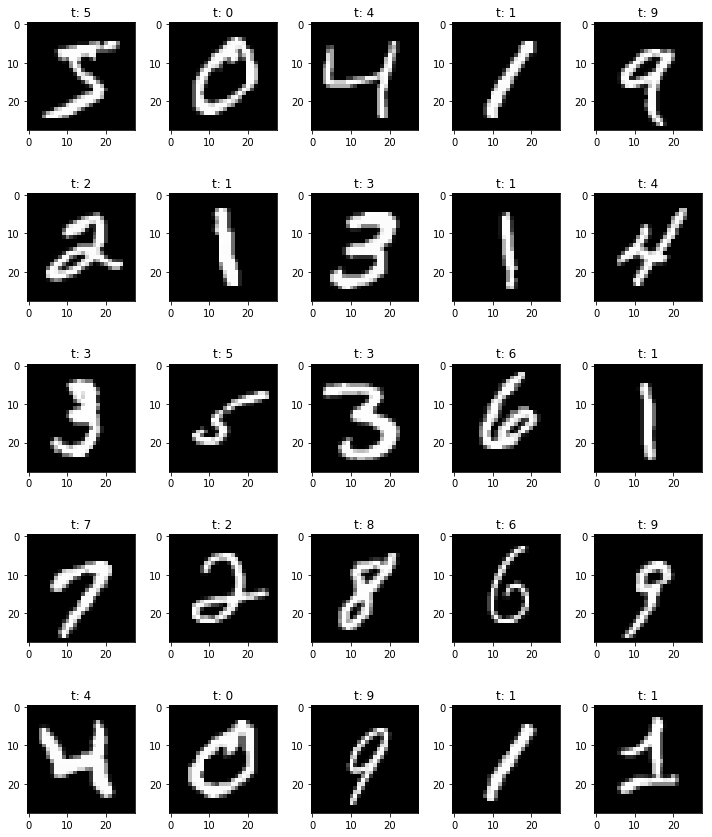

In [9]:
fig, axes = plt.subplots(5, 5, figsize = (10, 12))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap="gray")
    ax.set_title("t: %d" % (y_train[i]))
plt.tight_layout()

In [17]:
%%time 

est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15, random_state = 1, 
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("Accuracy: %f" % (
    metrics.accuracy_score(y_test, y_test_pred)
))


Accuracy: 0.908300
CPU times: user 11 s, sys: 229 ms, total: 11.3 s
Wall time: 4.69 s


In [11]:
wrong_predictions = y_test != y_test_pred

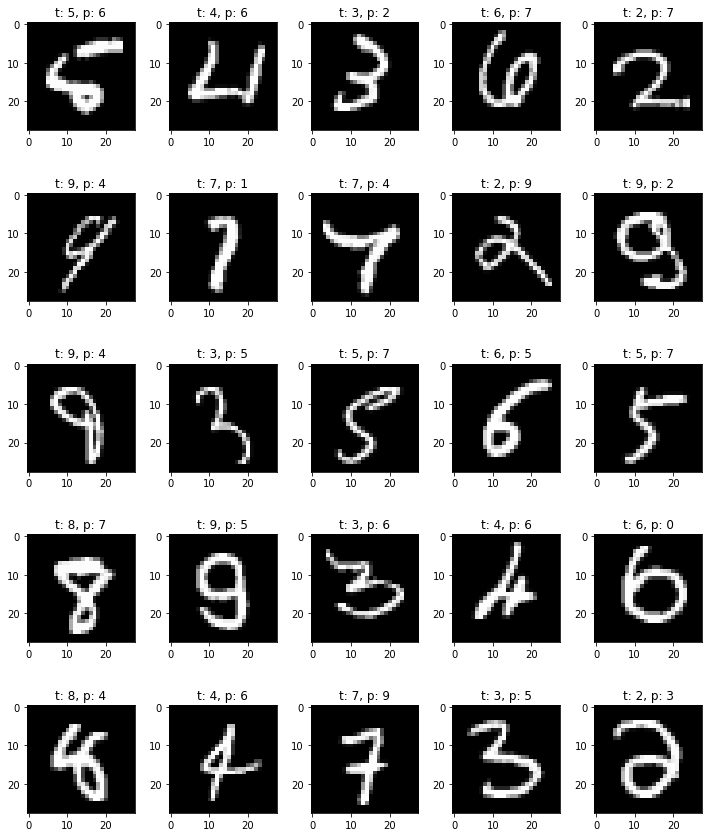

In [12]:
fig, axes = plt.subplots(5, 5, figsize = (10, 12))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[wrong_predictions][i].reshape((28, 28)), cmap="gray")
    ax.set_title("t: %d, p: %d" % (y_test[wrong_predictions][i]
                                   , y_test_pred[wrong_predictions][i]))
plt.tight_layout()

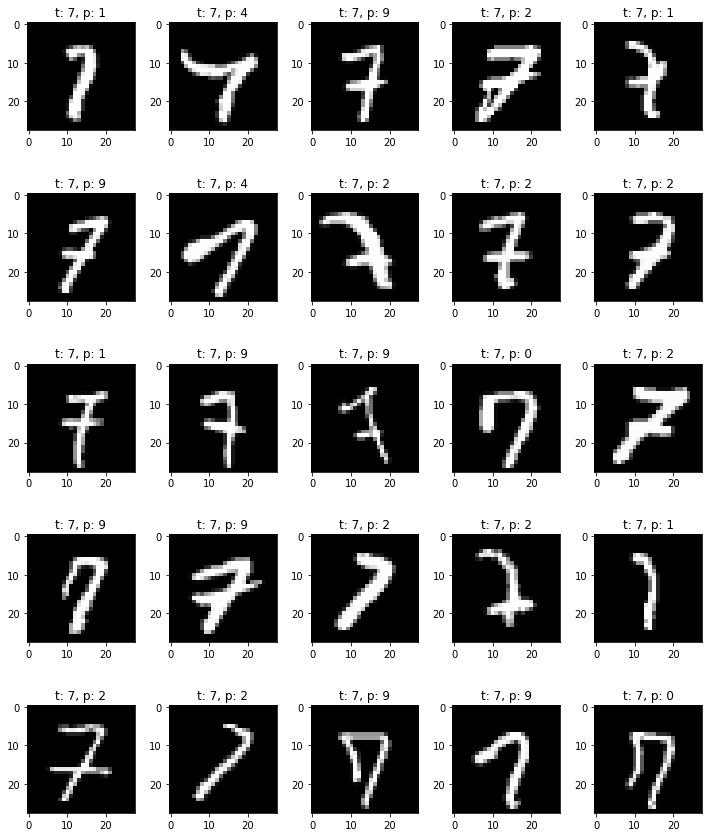

In [13]:
fig, axes = plt.subplots(5, 5, figsize = (10, 12))
for i, ax in enumerate(fig.axes):
    target = 7
    ax.imshow(X_test[wrong_predictions & (y_test == target)][i].reshape((28, 28)), cmap="gray")
    ax.set_title("t: %d, p: %d" % (y_test[wrong_predictions & (y_test == target)][i]
                                   , y_test_pred[wrong_predictions & (y_test == target)][i]))
plt.tight_layout()

In [14]:
result = pd.DataFrame({"t": y_test, "p": y_test_pred, "v": 1})[wrong_predictions]

In [28]:
import keras

In [31]:
from time import time
int(time())

1533288325

In [34]:
tboard = keras.callbacks.TensorBoard("/tmp/tf/%d" % int(time()))
model = keras.Sequential()
model.add(keras.layers.InputLayer([784]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile("adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

model.fit(X_train, keras.utils.to_categorical(y_train), callbacks=[tboard]
              , validation_data=(X_test, keras.utils.to_categorical(y_test))
              , epochs=10, batch_size=64)

model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.2154 - acc: 0.9370 - val_loss: 0.1160 - val_acc: 0.9645
Epoch 2/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0856 - acc: 0.9738 - val_loss: 0.0780 - val_acc: 0.9744
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0544 - acc: 0.9828 - val_loss: 0.0762 - val_acc: 0.9773
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0426 - acc: 0.9866 - val_loss: 0.0739 - val_acc: 0.9768
Epoch 5/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0302 - acc: 0.9903 - val_loss: 0.0732 - val_acc: 0.9793
Epoch 6/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0240 - acc: 0.9923 - val_loss: 0.0704 - val_acc: 0.9809
Epoch 7/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0203 - acc: 0.9930 - val_loss: 0.

In [25]:
pd.DataFrame(keras.utils.to_categorical(y_train))

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Open anaconda prompt and 

$ tensorboard --logdir=.

In [35]:
X_train_2d = X_train.reshape((-1, 28, 28, 1))
X_test_2d = X_test.reshape((-1, 28, 28, 1))
X_train_2d.shape, X_tes_2d.shape

(60000, 28, 28, 1)

In [ ]:
tboard = keras.callbacks.TensorBoard("/tmp/tf/%d" % int(time()))
model = keras.Sequential()
model.add(keras.layers.InputLayer([28, 28, 1]))

model.add(keras.layers.Conv2D(32, (5, 5), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile("adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])

model.fit(X_train, keras.utils.to_categorical(y_train), callbacks=[tboard]
              , validation_data=(X_test, keras.utils.to_categorical(y_test))
              , epochs=10, batch_size=64)

model.summary()